**Import Dependencies**

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from PIL import Image
from emnist import list_datasets
from emnist import extract_test_samples



 **Emnist Digit Dataset**

In [43]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [44]:
images, labels = extract_training_samples('digits')
images.shape

(240000, 28, 28)

In [49]:
# load train and test dataset of emnist dataset
def load_dataset():
 trainX, trainY = extract_training_samples('digits')
 testX, testY = extract_test_samples('digits')
 # reshape dataset to have a single channel as for grayscale image
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 #  target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY


**Data Preprocessing**

In [50]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 return train_norm, test_norm

**Load weights of Pre Trained Model and Evaluation**

In [51]:
def check_accuracy():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = load_model('my_trained_model.h5')
  loss, acc = model.evaluate(testX, testY, verbose=0)

  #Check Loss and Accuracy
  print('Test Loss: %.3f' % loss)
  print('Test Accuracy: %.3f' % (acc * 100.0))

 
check_accuracy()
     

Test Loss: 0.280
Test Accuracy: 93.260


**Input Image**

In [52]:
def load_image(filename):
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel as for grayscale image
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

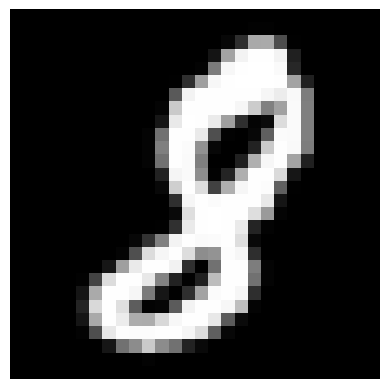

In [58]:
# show the mnist image for test purpose as I have downloaded in my machine
image = Image.open('emnist_8.png')
image.show()

**Prediction**

In [60]:
# load an image and predict the class
def run_example():
 img = load_image('emnist_8.png')
 # load model
 model = load_model('my_trained_model.h5')
 # predict the class
 predict_value = model.predict(img)
 digit = argmax(predict_value)
 print(digit)
 
run_example()

1/1 [==============================] - 0s 86ms/step
8


*Hence our pretrained model's weights over mnist digit dataset perform transfer learning over emnist digit very well*